# Projeto 2 - Ciência dos Dados

## Engenharia 2A


### Gustavo Pinheiro de Carvalho
### Celina Vieira de Melo
### Gabriel Penna de Lima
### Maria Eduarda Mourão

# Introdução

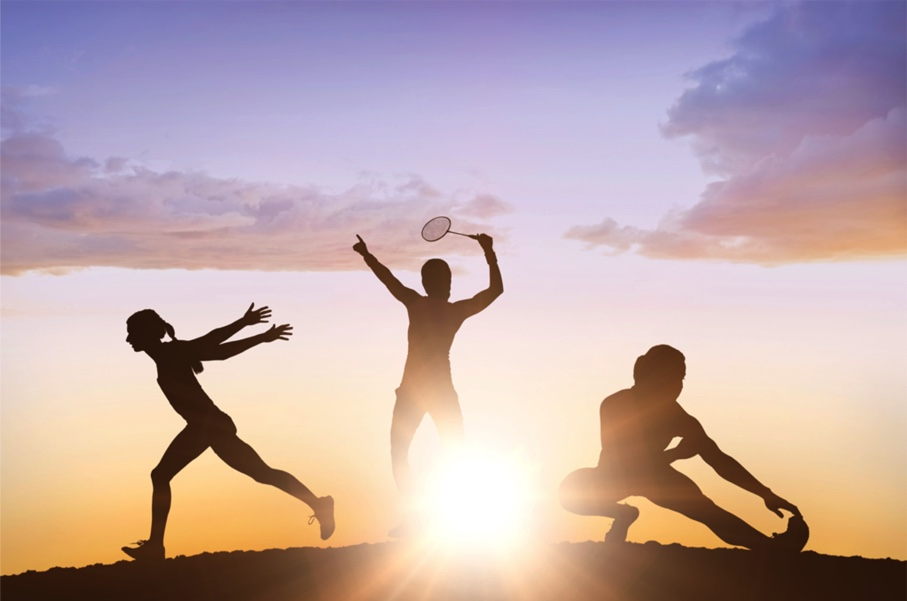

   No projeto 2 da disciplina Ciência dos Dados do segundo semestre de Engenharia do Insper, foi pedido que descrevêssemos o processo de análise de um dataset a fim de prever uma variável principal (TARGET) em função de demais outras variáveis que poderiam influenciar o seu comportamento (FEATURES). Dessa forma, seriamos capazes de prever rótulos ou informações numéricas para a variável target escolhida a partir de técnicas de classificação, como regressão linear, decision tree, random forest, entre outras.

Para isso, decidimos abordar um tema bastante atual, que engloba o momento que estamos vivendo em relação a pandemia e a importância da prática de atividades físicas para o bem estar da população, principalmente durante esse momento tão difícil. Estudos no mundo inteiro vem demonstrando que 30 minutos de atividades físicas diárias de forma moderada, equivalentes a uma caminhada mais vigorosa, realizar 150 minutos semanais de exercícios físicos aeróbicos moderados ou 75 minutos semanais de exercícios mais vigorosos, tornam a vida da pessoa mais saudável [1].

Dessa forma, tivemos a ideia de fazer uma análise do comportamento da população em relação a atividades físicas durante a pandemia do Coronavírus, visto que os órgãos reguladores tiveram que criar inúmeras restrições ao estilo de vida da população para conter a disseminação do vírus e esse tema se tornou ainda mais significante para combater os efeitos da pandemia acerca do bem estar e da saúde mental das pessoas. 

Segundo recomendações da Organização Mundial da Saúde (OMS), crianças e jovens menores de 17 anos devem realizar 60 minutos de atividades físicas diárias com média a alta intensidade aeróbica. Para maiores de 17 anos, é recomendada a realização de pelo menos 75 minutos de exercício físico semanais de média intensidade aeróbica ou de pelo menos 150 minutos de exercício físico semanais de alta intensidade aeróbica, somado a exercícios de fortalecimento dos músculos e estrutura óssea 2 vezes na semana [2].

No contexto brasileiro, um estudo divulgado em janeiro de 2021 pela Organização Mundial de Saúde (OMS) confirma que o brasileiro se exercita menos do que deveria. O levantamento aponta que, nos últimos 15 anos, praticamente um em cada dois adultos (47%) no Brasil não faz atividades físicas suficientemente [3]. 

Em tempos de pandemia, com a restrição da circulação das pessoas e com o fechamento temporário de estabelecimentos para a prática de esportes, poderíamos pensar que essa situação teria apenas piorado. Na verdade, não poderíamos estar mais enganados, pois uma pesquisa brasileira realizada com 16 mil pessoas contraria essa tendência, mostrando que o percentual de praticantes pré-pandemia não mudou muito. Utilizando um questionário online disseminado por redes sociais no ano passado, a apuração identificou que 40% dos entrevistados estavam fazendo algum exercício durante a quarentena. [4]

# <font color='blue'>Base de Dados: Pesquisa sobre a prática de atividades físicas</font> 

Voltando para o projeto, foi avaliada a frequência de exercícios semanais que as pessoas estavam realizando durante a pandemia, e por não existir um dataset que já nos fornecesse, decidimos realizar um Google Forms com diversas perguntas relacionadas ao tema e as informações de cada um dos participantes.

Como estávamos um pouco apreensivos com a receptividade dos participantes ao nosso formulário, decidimos pegar apenas algumas informações pessoais básicas, mas que nos guiasse nas condições fisiológicas de cada participante. Além disso, fizemos várias perguntas sobre a frequência, forma e tempo de exercício estimado que elas realizam por semana. No final, ficamos surpresos com a participação de tantas pessoas, e conseguimos dados de 170 participantes.

Link da pesquisa: https://docs.google.com/forms/d/1ipv8PgUMkudfi-mbXNFdrKsHpOQUSKgA4RBEw2M3X5s/edit#responses

Com as respostas do formulário em mãos, criamos um arquivo de excel chamado `"Pesquisa.xlsx."` que contém todas as respostas geradas.

 

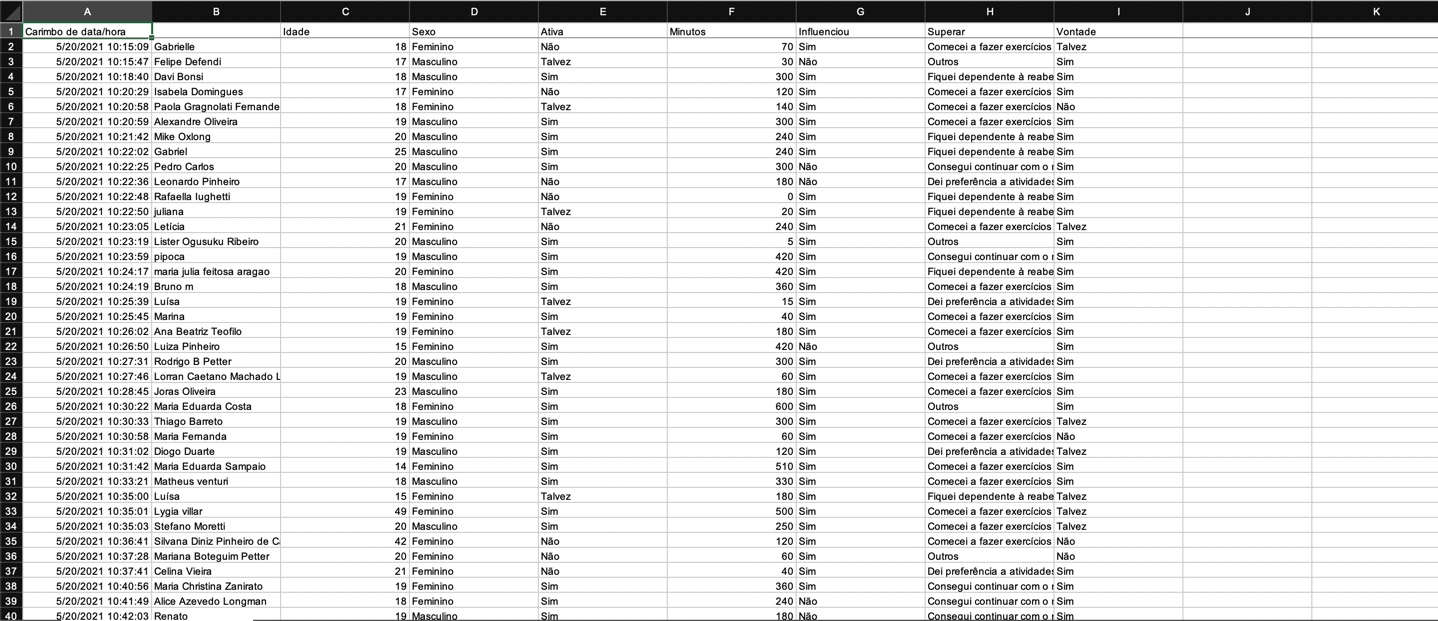

  A base de dados agrupa todas as respostas dos participantes da pesquisa que realizamos, de forma que nela consta: 


Variável | Descrição
:---:|---:
Carimbo de data/hora| Horário de preechimento do formulário
Nome | Nome do participante (opcional)
Idade | Idade do participante (em anos)
Sexo | Masculino ou Feminino
Ativa | Você se considera uma pessoa fisicamente ativa?
Minutos | Quantos MINUTOS de atividade física você faz durante a SEMANA?
Influenciou| A pandemia influenciou a sua prática de atividades físicas?
Superar| O que você fez para superar as barreiras que a pandemia impôs a prática de atividades físicas?
Vontade| Você sente a vontade de realizar atividades físicas em maior frequência?


## Importando as bibliotecas necessárias para a analise dos dados

In [2]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

from scipy import stats

## Análise dos dados

In [3]:
print(os.getcwd())

C:\Users\dudsm\Downloads\P2-CD21-1-main\P2-CD21-1-main


In [4]:
dados = pd.read_excel('Pesquisa.xlsx')
dados

,Carimbo de data/hora,Nome\n,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade
0,2021-05-20 10:15:08.814,Gabrielle,18,Feminino,Não,70,Sim,Comecei a fazer exercícios em casa,Talvez
1,2021-05-20 10:15:47.122,Felipe Defendi,17,Masculino,Talvez,30,Não,Outros,Sim
2,2021-05-20 10:18:40.453,Davi Bonsi,18,Masculino,Sim,300,Sim,Fiquei dependente à reabertura das academias,Sim
3,2021-05-20 10:20:29.293,Isabela Domingues,17,Feminino,Não,120,Sim,Comecei a fazer exercícios em casa,Sim
4,2021-05-20 10:20:57.775,Paola Gragnolati Fernandes,18,Feminino,Talvez,140,Sim,Comecei a fazer exercícios em casa,Não
...,...,...,...,...,...,...,...,...,...
165,2021-05-21 10:41:20.303,Zuleika Syudart de lucena feitosa,56,Feminino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim
166,2021-05-21 10:51:12.881,Daniela,19,Feminino,Sim,200,Sim,Comecei a fazer exercícios em casa,Sim
167,2021-05-21 13:07:05.650,Ticiana Hissa,43,Feminino,Sim,3000,Não,Comecei a fazer exercícios em casa,Não
168,2021-05-21 13:14:57.503,NaN,43,Masculino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim


## Limpezas de dados necessárias

### Carimbo de data/hora

Para a análise do nosso problema, julgamos que essa coluna não possui nenhuma relação com o objetivo que estamos buscando, portanto, resolvemos tira-lá.

In [5]:
dados = dados.drop(columns=['Carimbo de data/hora'])
dados

,Nome\n,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade
0,Gabrielle,18,Feminino,Não,70,Sim,Comecei a fazer exercícios em casa,Talvez
1,Felipe Defendi,17,Masculino,Talvez,30,Não,Outros,Sim
2,Davi Bonsi,18,Masculino,Sim,300,Sim,Fiquei dependente à reabertura das academias,Sim
3,Isabela Domingues,17,Feminino,Não,120,Sim,Comecei a fazer exercícios em casa,Sim
4,Paola Gragnolati Fernandes,18,Feminino,Talvez,140,Sim,Comecei a fazer exercícios em casa,Não
...,...,...,...,...,...,...,...,...
165,Zuleika Syudart de lucena feitosa,56,Feminino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim
166,Daniela,19,Feminino,Sim,200,Sim,Comecei a fazer exercícios em casa,Sim
167,Ticiana Hissa,43,Feminino,Sim,3000,Não,Comecei a fazer exercícios em casa,Não
168,NaN,43,Masculino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim


### Nome

Para a análise do nosso problema, julgamos que essa coluna não possui nenhuma relação com o objetivo que estamos buscando, portanto, resolvemos tira-lá.

In [6]:
dados = dados.drop(columns=['Nome\n'])
dados

,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade
0,18,Feminino,Não,70,Sim,Comecei a fazer exercícios em casa,Talvez
1,17,Masculino,Talvez,30,Não,Outros,Sim
2,18,Masculino,Sim,300,Sim,Fiquei dependente à reabertura das academias,Sim
3,17,Feminino,Não,120,Sim,Comecei a fazer exercícios em casa,Sim
4,18,Feminino,Talvez,140,Sim,Comecei a fazer exercícios em casa,Não
...,...,...,...,...,...,...,...
165,56,Feminino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim
166,19,Feminino,Sim,200,Sim,Comecei a fazer exercícios em casa,Sim
167,43,Feminino,Sim,3000,Não,Comecei a fazer exercícios em casa,Não
168,43,Masculino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim


## Analise dos dados

### Idade

Para fazer a análise da idade das amostras contidas nos dados, decidimos analisar quais as idades que mais aparecem no nosso dataset, a média dessas idades e a distribuição delas.

#### Idade X Quantos MINUTOS de atividade física você faz durante a SEMANA

Text(0.5, 1.0, 'Distribuição das Idades dos participantes')

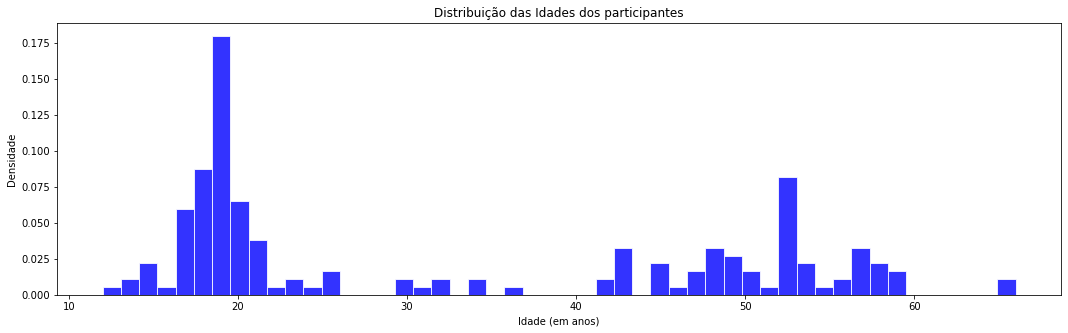

In [7]:
plt.figure(figsize=(18, 5))
plt.hist(dados['Idade'], bins=50, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Idade (em anos)')
plt.title('Distribuição das Idades dos participantes')

In [8]:
dados.Idade.describe()

count    170.000000
mean      32.523529
std       16.190509
min       12.000000
25%       19.000000
50%       21.000000
75%       49.000000
max       66.000000
Name: Idade, dtype: float64

Pela análise da distribuição das idades dos participantes da pesquisa, podemos aferir que existe uma maior concentração de amostras com idades próximas de 19 anos, que pode ser justificado pelo maior alcance que temos no público dessa idade.

Porém, obtivemos respostas de pessoas de diferentes idades, e por isso podemos repartir os nossos dados segundo faixas etárias para fazer uma análise focada especialmente em alguma dessas faixas.

### Sexo

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa.

In [9]:
dados.Sexo.value_counts(True)

Feminino     0.564706
Masculino    0.435294
Name: Sexo, dtype: float64

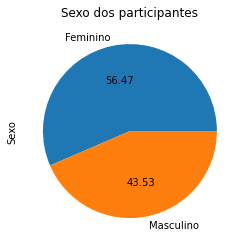

In [10]:
sexo = dados.Sexo.value_counts()
sexo.plot(kind='pie', title='Sexo dos participantes', autopct="%.2f")

### Você se considera uma pessoa fisicamente ativa?

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa. Pórem, nesse caso, seremos capazes de analisar o que as pessoas julgam ser "uma pessoa fisicamente ativa", nos dando a possibilidade de observar nos dados as pessoas que realmente são fisicamente ativas e as que não são.

In [11]:
dados.Ativa.value_counts(True)

Sim       0.676471
Não       0.241176
Talvez    0.082353
Name: Ativa, dtype: float64

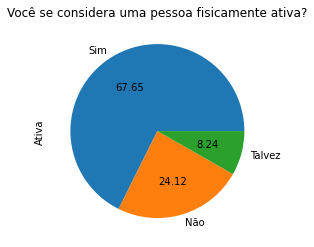

In [12]:
ativa = dados.Ativa.value_counts()
ativa.plot(kind='pie', title='Você se considera uma pessoa fisicamente ativa?', autopct="%.2f")

### Quantos MINUTOS de atividade física você faz durante a SEMANA?

Para fazer a análise do tempo destinado a atividades físicas por semana das amostras contidas nos dados, decidimos analisar quais os tempos que mais aparecem no nosso dataset, a média dessas tempos e a distribuição deles.

Text(0.5, 1.0, 'Distribuição da frequência de exercício dos participantes POR SEMANA')

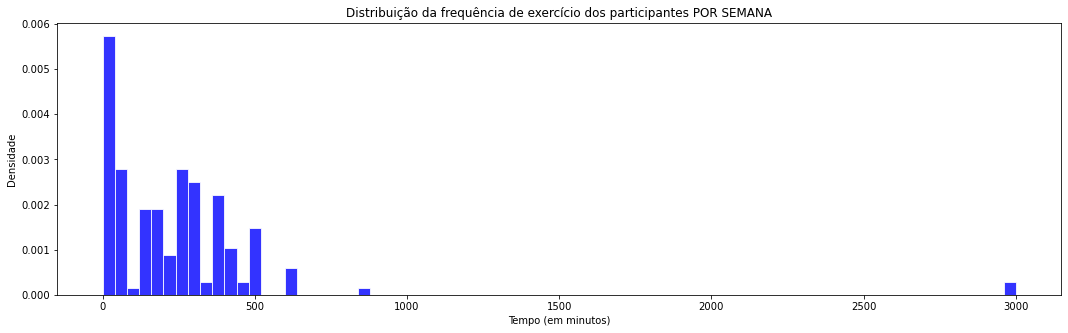

In [13]:
plt.figure(figsize=(18, 5))
plt.hist(dados['Minutos'], bins=75, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Tempo (em minutos)')
plt.title('Distribuição da frequência de exercício dos participantes POR SEMANA')

#### Dados menores que 10:

Pela análise dos dados, percebemos que essa pergunta teve um grau de dificuldade de interpretação baseado nas respostas que obtivemos, pois acreditamos que algumas amostras apresentam parâmetros diferentes do que haviamos perguntando, como VEZES que realiza exercícios durante a semana ou HORAS que realiza exercícios durante a semana.

Considerando esses possíveis erros de interpretação, decidimos contabilizar apenas os dados que apresentam um número maior que 10 minutos de exercícios físicos por semana, incluindo também as amostras que apresentaram o número 0, pois independente da interpretação, a pergunta receberia a mesma resposta.

In [14]:
menor_10_diferente_0 = dados.loc[(dados['Minutos']<10) & (dados['Minutos']!=0)]
menor_10_diferente_0


,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade
13,20,Masculino,Sim,5,Sim,Outros,Sim
39,18,Feminino,Não,2,Sim,Outros,Não
44,15,Feminino,Sim,8,Sim,Comecei a fazer exercícios em casa,Talvez
46,50,Masculino,Sim,9,Sim,Comecei a fazer exercícios em casa,Não
51,19,Masculino,Não,5,Sim,Fiquei dependente à reabertura das academias,Sim
53,17,Feminino,Sim,3,Não,Fiquei dependente à reabertura das academias,Sim
54,19,Masculino,Sim,8,Sim,Comecei a fazer exercícios em casa,Sim
58,18,Feminino,Sim,7,Sim,Comecei a fazer exercícios em casa,Não
76,20,Feminino,Sim,5,Sim,Comecei a fazer exercícios em casa,Talvez
82,19,Masculino,Não,5,Sim,Fiquei dependente à reabertura das academias,Sim


In [15]:
dados = dados.drop(menor_10_diferente_0.index)

### Quantos MINUTOS de atividade física você faz durante a SEMANA

Text(0.5, 1.0, 'Distribuição da frequência de exercício dos participantes POR SEMANA')

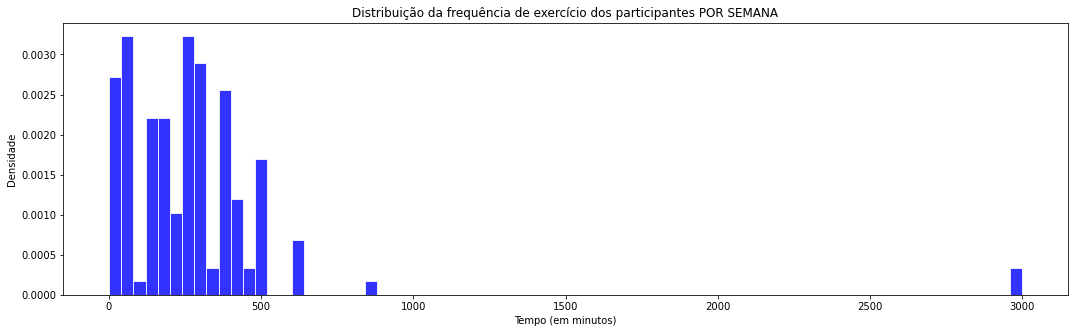

In [16]:
plt.figure(figsize=(18, 5))
plt.hist(dados['Minutos'], bins=75, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Tempo (em minutos)')
plt.title('Distribuição da frequência de exercício dos participantes POR SEMANA')

#### Valores aberrantes:

Pela análise do histograma, podemos perceber a existência de um valor aberrante, e quando fomos analisá-lo, descobrimos que ele poderia ser um erro nas respostas do formulário, pois representa uma média de 7,14 horas por dia, algo humanamente impróvavel.

In [17]:
dados = dados.drop(dados[dados['Minutos'] > 1000].index)

#### Quantos MINUTOS de atividade física você faz durante a SEMANA

Text(0.5, 1.0, 'Distribuição da frequência de exercício dos participantes POR SEMANA')

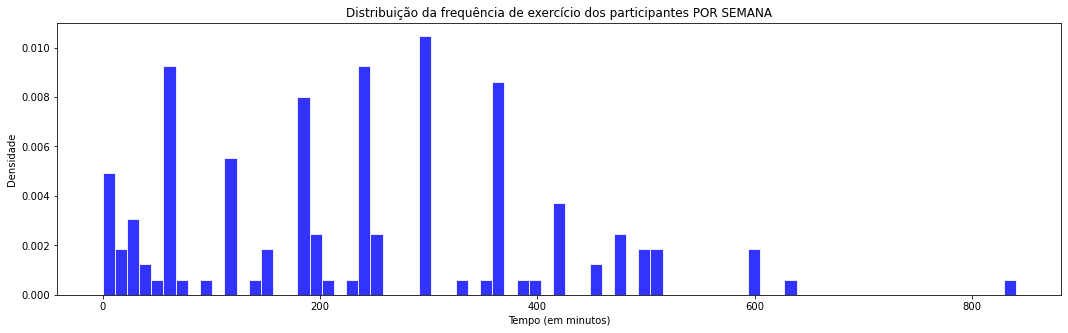

In [18]:
plt.figure(figsize=(18, 5))
plt.hist(dados['Minutos'], bins=75, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Tempo (em minutos)')
plt.title('Distribuição da frequência de exercício dos participantes POR SEMANA')

#### Descrição da variável

In [19]:
dados.Minutos.describe()

count    145.000000
mean     237.951724
std      163.763902
min        0.000000
25%      120.000000
50%      240.000000
75%      360.000000
max      840.000000
Name: Minutos, dtype: float64

#### Idade X Quantos MINUTOS de atividade física você faz durante a SEMANA

Realizando uma análise dos resultados, podemos perceber que obtivemos uma média de aproximadamente 206.16 minutos de exercícios por semana, com a 

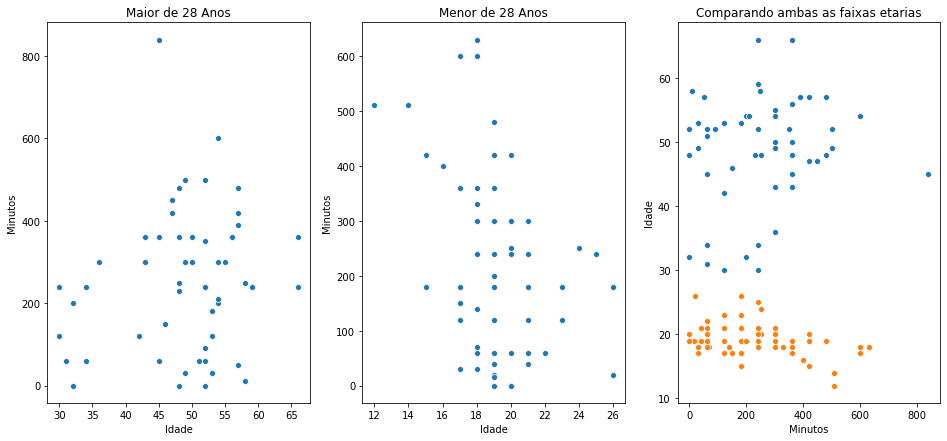

In [20]:
dados_maior28 = dados.loc[dados['Idade'] > 28, :]
dados_menor28 = dados.loc[dados['Idade'] <=28, :]

plt.figure(figsize=(16,7))

plt.subplot(131)
plt.title("Maior de 28 Anos")
plt.xlabel("Idade (Anos)")
sns.scatterplot(dados_maior28['Idade'], dados_maior28['Minutos'])

plt.subplot(132)
plt.title("Menor de 28 Anos")
plt.xlabel("Idade (Anos)")
sns.scatterplot(dados_menor28['Idade'], dados_menor28['Minutos'])

plt.subplot(133)
plt.title("Comparando ambas as faixas etarias")
plt.xlabel("Idade (Anos)")
sns.scatterplot(dados_maior28['Minutos'], dados_maior28['Idade'])
sns.scatterplot(dados_menor28['Minutos'], dados_menor28['Idade'])




## Sexo

#### Quantos MINUTOS de atividade física você faz durante a SEMANA X Sexo MASCULINO

Text(0.5, 1.0, 'Distribuição do tempo de atividade dos participantes do sexo masculino por minuto')

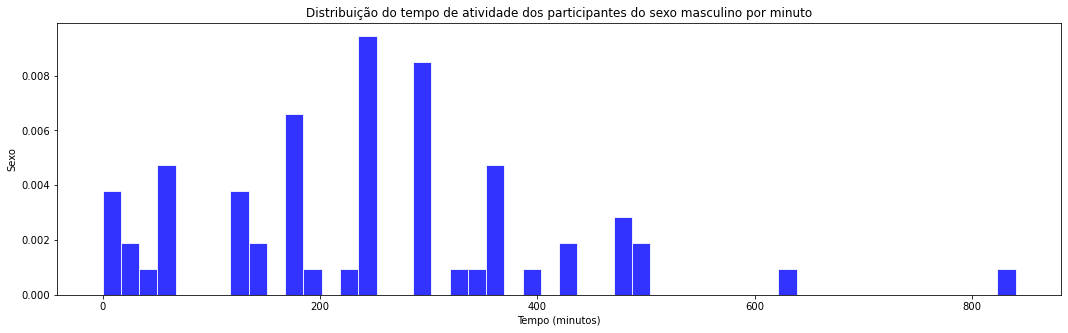

In [21]:
masculino = dados.loc[dados['Sexo'] == 'Masculino',:]

plt.figure(figsize=(18, 5))
plt.hist(masculino['Minutos'], bins=50, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Sexo')
plt.xlabel('Tempo (minutos)')
plt.title('Distribuição do tempo de atividade dos participantes do sexo masculino por minuto')

#### Quantos MINUTOS de atividade física você faz durante a SEMANA X Sexo MASCULINO

Text(0.5, 1.0, 'Distribuição do tempo de atividade dos participantes do sexo feminino por minuto')

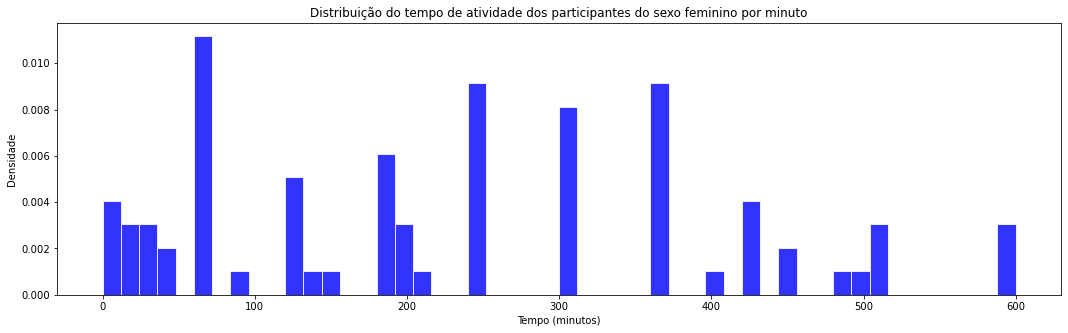

In [22]:
feminino = dados.loc[dados['Sexo'] == 'Feminino',:]

plt.figure(figsize=(18, 5))
plt.hist(feminino['Minutos'], bins=50, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Tempo (minutos)')
plt.title('Distribuição do tempo de atividade dos participantes do sexo feminino por minuto')

### A pandemia influenciou a sua prática de atividades físicas?

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa.

In [23]:
dados.Influenciou.value_counts(True)

Sim    0.77931
Não    0.22069
Name: Influenciou, dtype: float64

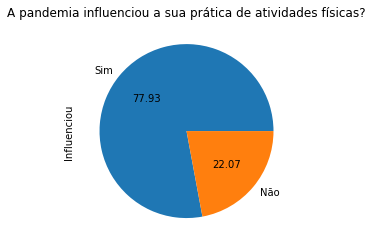

In [24]:
influenciou = dados.Influenciou.value_counts()
influenciou.plot(kind='pie', title='A pandemia influenciou a sua prática de atividades físicas?', autopct="%.2f")

### O que você fez para superar as barreiras que a pandemia impôs a prática de atividades físicas?

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa.

In [25]:
dados.Superar.value_counts(True)

Comecei a fazer exercícios em casa                                 0.544828
Outros                                                             0.165517
Dei preferência a atividades individuais                           0.124138
Fiquei dependente à reabertura das academias                       0.096552
Consegui continuar com o mesmo plano de exercícios que já tinha    0.068966
Name: Superar, dtype: float64

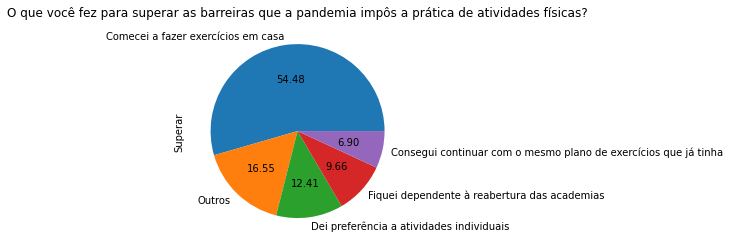

In [26]:
superar = dados.Superar.value_counts()
superar.plot(kind='pie', title='O que você fez para superar as barreiras que a pandemia impôs a prática de atividades físicas?', autopct="%.2f")

### Você sente a vontade de realizar atividades físicas em maior frequência?

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa.

In [27]:
dados.Vontade.value_counts(True)

Sim       0.737931
Talvez    0.137931
Não       0.124138
Name: Vontade, dtype: float64

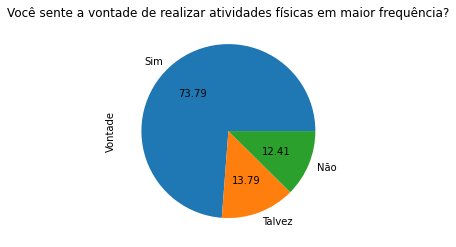

In [28]:
vontade = dados.Vontade.value_counts()
vontade.plot(kind='pie', title='Você sente a vontade de realizar atividades físicas em maior frequência?', autopct="%.2f")

# Modelos de Predição

## Regressão Linear por caracteristica especifica

   Regressão linear é um modelo linear que assume uma relação linear entre as variáveis de input (features) (x) e a variável única de output (target) (y). 
   
   Mais especificamente, essa relação significa que y pode ser calculada a partir de uma combinação linear das variáveis de input. A equação linear estabelece um fator de escala para cada variável de input, que recebe o nome de coeficiente angular e é representado por β.

   Quando existe apenas 1 variável de input (x), ou feature, o método é chamado de Regressão Linear Simples. Quando existem diversas variáveis features, o método é normalmente chamado de Regressão Linear Multipla.
Um exemplo de equação com apenas 1 variável de input, ou seja, de uma regressão linear simples, pode ser escrita por:
$$y_i=\beta_0+\beta_1x_i+\varepsilon_i$$

   Onde β i são os coeficiente do modelo de regressão e $\varepsilon_i$ representa os Erros Aleatórios.

   Diferentes técnicas podem ser utilizadas para preparar ou treinar a equação de regressão linear a partir dos dados, porém, o método de Mínimos Quadrados Ordinários (MQO ou OLS – Ordinary Least Squares em inglês) é o mais utilizado.
Esse método é utilizado para calcular os βs  do modelo de regressão, de forma que:

$$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$$

$$\hat{\beta}_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

### Suposições do modelo:
Para podermos aplicar o modelo, é necessário que façamos algumas suposições anteriores, sendo elas:
- Os erros tem distribuição NORMAL, com média 0 e variância constaste (N˜(0,σ2) );
- Os erros são INDEPENDENTES entre si, ou seja, a correlação entre os diferentes erros aleatórios é nula (𝐶𝑜𝑟𝑟(𝜀𝑖,𝜀𝑗)=0Corr(εi,εj)=0, para qualquer 𝑖≠𝑗);
- O modelo é linear nos parâmetros;
- Homocedasticidade: A variância dos erros é constante (𝑉𝑎𝑟(𝜀𝑖)=𝜎2Var(εi)=σ2 para qualquer 𝑖=1,…,𝑛).

## Gráfico Feminino

In [29]:
xf = feminino['Idade']
yf = feminino['Minutos']

Xf_dados = sm.add_constant(xf)

In [30]:
modelf = sm.OLS(yf, Xf_dados)    

resultsf = modelf.fit()   

resultsf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutos   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1125
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.738
Time:                        20:58:23   Log-Likelihood:                -534.48
No. Observations:                  82   AIC:                             1073.
Df Residuals:                      80   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.3330     42.953      5.665      0.000     157.854     328.812
Idade         -0.3926      1.171     -0.335      0.738      -2.723       1.937
==============================================================================
Omnibus:                        6.920   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                4.418
Skew:                           0.404   Prob(JB):                        0.110
Kurtosis:                       2.200   Cond. No.                         86.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
bf0 = resultsf.params['const'] #beta
bf1 = resultsf.params['Idade'] #beta

print("Estimativa de beta0 (coeficente linear): {0}".format(bf0))
print("Estimativa de beta1 (coeficente angular): {0}".format(bf1))

Estimativa de beta0 (coeficente linear): 243.33295683302504
Estimativa de beta1 (coeficente angular): -0.3926139141154188


In [32]:
resultsf.predict

xf_vec = np.linspace(xf.min(), xf.max(), 500)
yf_vec = bf0 + bf1*xf_vec

## Gráfico masculino

In [33]:
xm = masculino['Idade']
ym = masculino['Minutos']

Xm_dados = sm.add_constant(xm)

In [34]:
modelm = sm.OLS(ym, Xm_dados)    

resultsm = modelm.fit()   

resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutos   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     7.854
Date:                Tue, 08 Jun 2021   Prob (F-statistic):            0.00679
Time:                        20:58:24   Log-Likelihood:                -405.95
No. Observations:                  63   AIC:                             815.9
Df Residuals:                      61   BIC:                             820.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.2402     41.805      3.450      0.001      60.646     227.834
Idade          3.2654      1.165      2.802      0.007       0.935       5.595
==============================================================================
Omnibus:                       13.469   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.484
Skew:                           0.881   Prob(JB):                     0.000263
Kurtosis:                       4.781   Cond. No.                         77.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
bm0 = resultsm.params['const']
bm1 = resultsm.params['Idade']

print("Estimativa de beta0 (coeficente linear): {0}".format(bm0))
print("Estimativa de beta1 (coeficente angular): {0}".format(bm1))

Estimativa de beta0 (coeficente linear): 144.2402204413155
Estimativa de beta1 (coeficente angular): 3.2654330560985634


In [36]:
resultsm.predict

xm_vec = np.linspace(xm.min(), xm.max(), 500)
ym_vec = bm0 + bm1*xf_vec

## Gráfico maior de 28

In [37]:
xmaior = dados_maior28['Idade']
ymaior = dados_maior28['Minutos']

Xmaior_dados = sm.add_constant(xmaior)

In [38]:
modelmaior = sm.OLS(ymaior, Xmaior_dados)    

resultsmaior = modelmaior.fit()   

resultsmaior.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutos   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.239
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.270
Time:                        20:58:24   Log-Likelihood:                -424.40
No. Observations:                  65   AIC:                             852.8
Df Residuals:                      63   BIC:                             857.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.7728    128.819      0.938      0.352    -136.651     378.197
Idade          2.8698      2.578      1.113      0.270      -2.282       8.022
==============================================================================
Omnibus:                        6.319   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.604
Skew:                           0.563   Prob(JB):                       0.0607
Kurtosis:                       3.896   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
bmaior0 = resultsmaior.params['const'] #beta
bmaior1 = resultsmaior.params['Idade'] #beta

print("Estimativa de beta0 (coeficente linear): {0}".format(bmaior0))
print("Estimativa de beta1 (coeficente angular): {0}".format(bmaior1))

Estimativa de beta0 (coeficente linear): 120.77283059714931
Estimativa de beta1 (coeficente angular): 2.8698177882013405


In [40]:
resultsmaior.predict

xmaior_vec = np.linspace(xmaior.min(), xmaior.max(), 500)
ymaior_vec = bmaior0 + bmaior1*xf_vec

## Grafico menor de 28 

In [41]:
xmenor = dados_menor28['Idade']
ymenor = dados_menor28['Minutos']

Xmenor_dados = sm.add_constant(xmenor)

In [42]:
model = sm.OLS(ymenor, Xmenor_dados)    

resultsmenor = model.fit()   

resultsmenor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutos   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     13.92
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           0.000360
Time:                        20:58:25   Log-Likelihood:                -511.44
No. Observations:                  80   AIC:                             1027.
Df Residuals:                      78   BIC:                             1032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        708.6112    132.467      5.349      0.000     444.890     972.332
Idade        -25.8799      6.937     -3.731      0.000     -39.690     -12.070
==============================================================================
Omnibus:                        2.372   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.306   Jarque-Bera (JB):                2.338
Skew:                           0.366   Prob(JB):                        0.311
Kurtosis:                       2.592   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como resultado do statsmodels.OLS obtivemos uma tabela, que contém váruas informações. Estamos interessados nos valores de $\hat\beta_0$ (intercepto: `const`) e $\hat\beta_1$ (inclinação da reta: `Idade`). Tais valores que podem ser encontrados na coluna `coef` do *output* do OLS Regression Results.

In [43]:
bmenor0 = resultsmenor.params['const'] #beta
bmenor1 = resultsmenor.params['Idade'] #beta

print("Estimativa de beta0 (coeficente linear): {0}".format(bmenor0))
print("Estimativa de beta1 (coeficente angular): {0}".format(bmenor1))

Estimativa de beta0 (coeficente linear): 708.6112045760433
Estimativa de beta1 (coeficente angular): -25.8798788694482


In [44]:
resultsmenor.predict

xmenor_vec = np.linspace(xmenor.min(), xmenor.max(), 500)
ymenor_vec = bmenor0 + bmenor1*xf_vec


### Plot das retas ajustadas

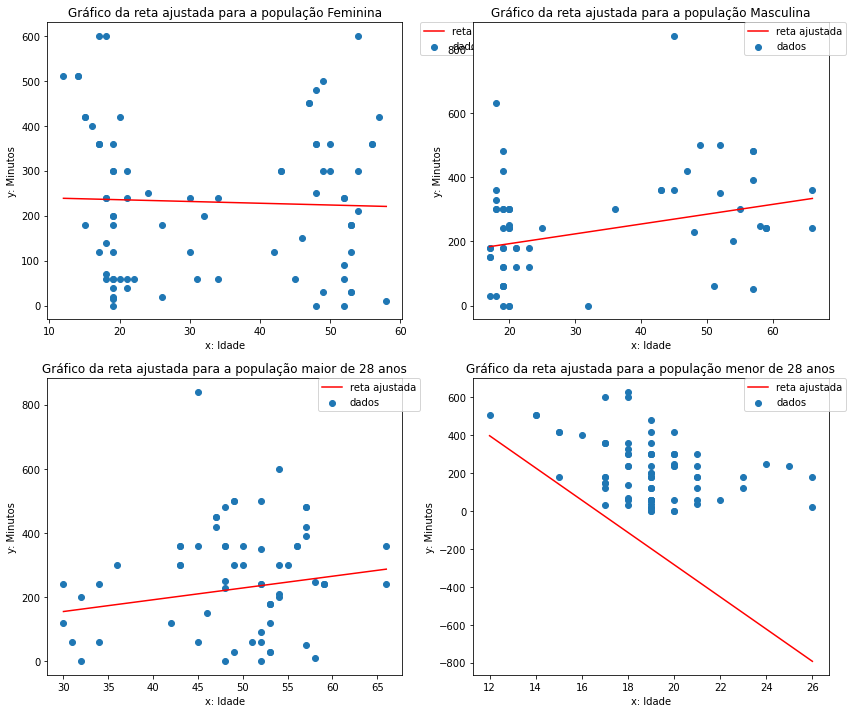

In [45]:
plt.figure(figsize=(14,12))

plt.subplot(221)
plt.plot(xf_vec,yf_vec, color="r") # resultados da regressão
plt.scatter(xf, yf); # dados
plt.title('Gráfico da reta ajustada para a população Feminina')
plt.xlabel("x: Idade")
plt.ylabel("y: Minutos")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.subplot(222)
plt.plot(xm_vec,ym_vec, color="r") # resultados da regressão
plt.scatter(xm, ym); # dados
plt.title('Gráfico da reta ajustada para a população Masculina')
plt.xlabel("x: Idade")
plt.ylabel("y: Minutos")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.subplot(223)
plt.plot(xmaior_vec,ymaior_vec, color="r") # resultados da regressão
plt.scatter(xmaior, ymaior); # dados
plt.title('Gráfico da reta ajustada para a população maior de 28 anos')
plt.xlabel("x: Idade")
plt.ylabel("y: Minutos")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.subplot(224)
plt.plot(xmenor_vec,ymenor_vec, color="r") # resultados da regressão
plt.scatter(xmenor, ymenor); # dados
plt.title('Gráfico da reta ajustada para a população menor de 28 anos')
plt.xlabel("x: Idade")
plt.ylabel("y: Minutos")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

##  Modelo Regressão Linear Múltipla

Após analisar o modelo de regressão simples decidimos criar um modelo que englobe todas as variáveis fits do nosso Datasheet

In [46]:
dados['Sexo_index'] = dados.Sexo.map({'Feminino':0,'Masculino':1, 'Outro':1})
dados['Ativa_index'] = dados.Ativa.map({'Não':0,'Sim':1,'Talvez':2})
dados['Influenciou_index'] = dados.Influenciou.map({'Não':0,'Sim':1 })
dados['Superar_index'] = dados. Superar.map({'Comecei a fazer exercícios em casa':0,'Dei preferência a atividades individuais':1,'Consegui continuar com o mesmo plano de exercícios que já tinha':2,'Fiquei dependente à reabertura das academias':3,'Outros':4})
dados['Vontade_index'] = dados.Vontade.map({'Não':0,'Sim':1,'Talvez':2})
dados.dropna()
dados

,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade,Sexo_index,Ativa_index,Influenciou_index,Superar_index,Vontade_index
0,18,Feminino,Não,70,Sim,Comecei a fazer exercícios em casa,Talvez,0,0,1,0,2
1,17,Masculino,Talvez,30,Não,Outros,Sim,1,2,0,4,1
2,18,Masculino,Sim,300,Sim,Fiquei dependente à reabertura das academias,Sim,1,1,1,3,1
3,17,Feminino,Não,120,Sim,Comecei a fazer exercícios em casa,Sim,0,0,1,0,1
4,18,Feminino,Talvez,140,Sim,Comecei a fazer exercícios em casa,Não,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
163,17,Feminino,Sim,600,Sim,Comecei a fazer exercícios em casa,Talvez,0,1,1,0,2
164,43,Feminino,Sim,300,Sim,Comecei a fazer exercícios em casa,Não,0,1,1,0,0
165,56,Feminino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim,0,1,1,0,1
166,19,Feminino,Sim,200,Sim,Comecei a fazer exercícios em casa,Sim,0,1,1,0,1


In [47]:
Y = dados['Minutos']
X = dados[['Idade','Sexo_index', 'Ativa_index', 'Influenciou_index', 'Superar_index', 'Vontade_index']]


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=101)


In [49]:
model = sm.OLS(y_train, X_train)    

results = model.fit()   

results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Minutos   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              46.84
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                    1.30e-25
Time:                        20:58:30   Log-Likelihood:                         -614.01
No. Observations:                  96   AIC:                                      1240.
Df Residuals:                      90   BIC:                                      1255.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Idade                 2.3185      0.763      3.037      0.003       0.802       3.835
Sexo_index           46.5482     31.779      1.465      0.146     -16.587     109.684
Ativa_index         126.7121     28.120      4.506      0.000      70.847     182.577
Influenciou_index    18.3080     32.198      0.569      0.571     -45.658      82.274
Superar_index       -27.3598      9.282     -2.947      0.004     -45.801      -8.919
Vontade_index        58.8751     28.279      2.082      0.040       2.694     115.057
==============================================================================
Omnibus:                        3.758   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.208
Skew:                           0.307   Prob(JB):                        0.201
Kurtosis:                       3.652   Cond. No.                         85.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
b0 = results.params[0] # Coeficiente angular Idade
b1 = results.params[1] # Coeficiente angular Sexo_index
b2 = results.params[2] # Coeficiente angular Ativa_index
b3 = results.params[3] # Coeficiente angular Influenciou_index
b4 = results.params[4] # Coeficiente angular Superar_index
b5 = results.params[5] # Coeficiente angular Vontade_index


In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Idade,0.716898
Sexo_index,36.664835
Ativa_index,106.225698
Influenciou_index,-23.896048
Superar_index,-36.736323
Vontade_index,19.518166


In [53]:
predictions = model.predict(X_test)


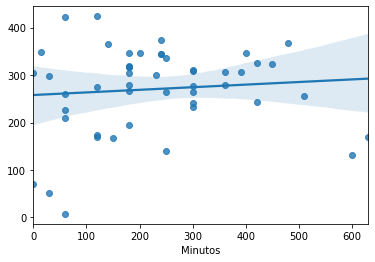

In [54]:
sns.regplot(y_test,predictions)

É uma medida de quão bem uma regressão capta a variação presente nos dados, ou parafraseando, o quanto de variabilidade nos dados é explicada pelo modelo de regressão. Varia entre 0 e 1, ou 0 a 100%, e indica a quantidade de dados do total que se encaixam no modelo de regressão.

Nem sempre um R-Squared alto indicará a qualidade do modelo de regressão, isso acontece porque existem diversos outros fatores que podem influenciar no modelo.

## Validação

### Observação dos resultados

In [55]:
validacao = pd.DataFrame()
validacao['Valores Reais'] = y_test
validacao['Valores Preditos'] = predictions
validacao.head(10)

,Valores Reais,Valores Preditos
72,180,279.382744
164,300,277.141625
17,15,348.943606
74,150,167.739979
133,180,347.242988
147,300,311.088181
26,60,259.936065
33,120,170.199029
57,300,231.718437
77,180,317.552863


### $R^2$

 

Chamado de Coeficiente de Determinação, é um parametro cujo intuito é calcular a porcentagem da variança calculada pelo modelo de regressão, ou seja, ele dá uma estimativa do qual próximo da realidade o modelo chega.

Pode ser calculado atravez da equação:

$$ R^2 = 1 - \frac{SS_E}{SS_T}$$

Onde, variança dos residuos pode ser calculado por:

$$SS_{E}=\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)^2=\sum\limits_{i=1}^{n}\epsilon^2_{i}$$

E a variança total por:

$$SS_{T}=\sum\limits^{n}_{i=1}(y_i-\bar{y})^2$$

No exemplo, obtemos um valor R-Squared = 0.757, o que indica que um pouco mais de 75% dos dados se encaixam dentro do modelo de regressão linear estabelecido entre a variável principal MInutos e as demais variáveis explicativas.

### Resíduos

Para fazer o cálculo do vetor de resíduos, devemos comparar os dados reais para a frequência de atividades físicas semanais de cada pessoa presente na sessão de teste do nosso dataset com os valores preditos pelo modelo, de forma que:

$$ e_i=y_i-\hat{y_i} $$

Ou seja, os resíduos vão indicar a diferença para cada valor real observado em y quando comparado com o valor predito para y.

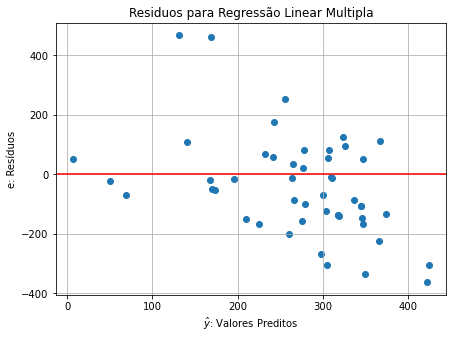

In [56]:
residuos=y_test-predictions
fig = plt.figure(figsize=(7,5)) 
plt.scatter(predictions,residuos); 
plt.axhline(y=0, color='r', linestyle='-'); 
plt.ylabel('e: Resíduos') 
plt.xlabel('$\hat{y}$: Valores Preditos') 
plt.title('Residuos para Regressão Linear Multipla') 
plt.grid() 
plt.show()



In [57]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 134.2845153895033
MSE: 30150.264272753986
RMSE: 173.6383145298122


## Decision Tree Regressor

Na regressão, temos que a variável é quantitativa. A construção de  regressão por árvores possibilita a explicação de uma variável resposta numérica por meio de um conjunto de covariáveis e de suas eventuais interações. O método CART
baseia-se na execução de partições binárias sucessivas de uma amostra, com base nos resultados amostrados das covariáveis, buscando a constituição de subamostras internamente homogêneas.

A classificação dessas subamostras é realizada conforme alguma medida descritiva e a predição de novos elementos, executada por meio da estrutura de classificação constituída.


In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
model = DecisionTreeRegressor()


In [60]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [61]:
predictions2 = model.predict(X_test)


## Sns.regplot:

O comando `”sns.regplot”`é responsável por fazer o gráfico com os dados da sessão de teste do dataset e o modelo de regressão.
Além disso, uma característica bastante interessante desse comando é abordar o intervalo de confiança do modelo de predição em prever os dados. O padrão é considerar um intervalo de 95%.

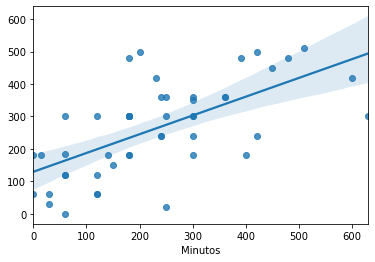

In [62]:
sns.regplot(y_test,predictions2)

## Validação

Análogo ao feito em regressão multipla, podemos ter:

In [63]:
validacao = pd.DataFrame()
validacao['Valores Reais'] = y_test
validacao['Valores Preditos'] = predictions
validacao.head(10)

,Valores Reais,Valores Preditos
72,180,279.382744
164,300,277.141625
17,15,348.943606
74,150,167.739979
133,180,347.242988
147,300,311.088181
26,60,259.936065
33,120,170.199029
57,300,231.718437
77,180,317.552863


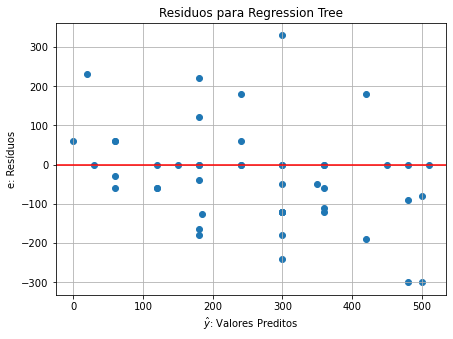

In [64]:
residuos2=y_test-predictions2
fig = plt.figure(figsize=(7,5)) 
plt.scatter(predictions2,residuos2); 
plt.axhline(y=0, color='r', linestyle='-'); 
plt.ylabel('e: Resíduos') 
plt.xlabel('$\hat{y}$: Valores Preditos') 
plt.title('Residuos para Regression Tree') 
plt.grid() 
plt.show()

## Probplot 
O comando cria um gráfico de probabilidade normal comparando a distribuição dos dados y com a distribuição normal. Ele plota cada ponto de Y e desenha uma linha de referencia representando a distribuição.

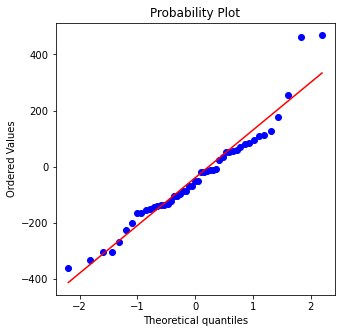

In [65]:
fig = plt.figure(figsize=(5,5)) 
stats.probplot(residuos,dist='norm', plot=plt);

## Validação

## Erro médio absoluto (MAE):

É uma medida de erros entre observações pareadas que expressam o mesmo fenômenouma. Portanto, é média aritmética dos erros absolutos



## Erro quadrático médio (MSE):
Informa o quão perto uma linha de regressão está de um conjunto de pontos. Ele faz isso pegando as distâncias dos pontos até a linha de regressão (essas distâncias são os “erros”) e elevando-as ao quadrado. O quadrado é necessário para remover quaisquer sinais negativos. Também dá mais peso a diferenças maiores. É chamado de erro quadrático médio, pois você encontra a média de um conjunto de erros. Quanto menor for o erro quadrático médio, mais perto você estará de encontrar a linha de melhor ajuste .

## Raiz quadrada do erro-médio (RMSE):
É uma medida frequentemente usada das diferenças entre os valores (valores de amostra ou população) previstos por um modelo ou um estimador e os valores observados. O RMSD representa a raiz quadrada do segundo momento amostral das diferenças entre os valores previstos e os valores observados ou a média quadrática dessas diferenças

In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions2)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions2)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE: 93.6734693877551
MSE: 16735.714285714286
RMSE: 129.36658875348877


## Conclusão

Depois de analisar as metricas de avaliação de modelos de predição, podemos perceber que:
#### Regressão Multipla :

MAE: 134.2845153895033

MSE: 30150.264272753986

RMSE: 173.6383145298122

#### D.T.R.:

MAE: 94.89795918367346

MSE: 17103.061224489797

RMSE: 130.77867266679914

Por tanto modelo com as melhores métricas, ou seja, com menor média aritmética de erros absolutos, menor erro quadrático médio, e menor raiz quadrada do erro médio entre valores previstos e observados, foi o modelo de Decision Tree Regression.

O motivos pelo qual os modelos não tiveram um resultado tão preciso se deve, principalmente, ao número limitado de dados na pesquisa. Com isso, tendo a limpeza feita, criamos um data frame menor do que o esperado, dificultando a nossa análise. Um melhoria significativa para o projeto seria a coleta de mais amostras para ser feito um estudo mais detalhado e completo. 
Além disso, muitas pessoas tiveram dificuldade em interpretar a pergunta sobre a quantidade de minutos que ela pratica atividade física porque algumas pessoas acharam que a resposta era em horas, onde, na verdade, que era em minutos. Assim, muitos dados ficaram sem sentido, dificultando uma análise muito concreta. Mesmo depois de alterar o enunciado na pesquisa  alguns participantes ainda continuaram tendo problemas de interpretação, sendo válido, então, pensarmos em como deixar a pergunta mais clara. Uma melhoria para essa questão seria a elaboração de um pergunta que deixe óbvio para os participantes a quantidade de horas e/ ou minutos que ele faz atividade física, que reduzisse os erros das respostas.

Porém, apesar de serem um pouco falhos, ambos os modelos conseguiram prever frequências semanais de exercícios físicos para os participantes presentes na sessão definida para testes no dataset e por isso seria capaz de prever frequências semanais de atividades físicas para novas pessoas, caso fossem fornecidas as mesmas informações.


## Referências

##### Introdução:
[Exercícios físicos: Por que devo ser ativo?](http://www.sbggrj.org.br/rj/arquivos/13821)**Fundamentação teórica do tema**

[Especialista explica a diferença entre atividade física, exercício e esporte](http://globoesporte.globo.com/al/noticia/2015/07/especialista-explica-diferenca-entre-atividade-fisica-exercicio-e-esporte.html#:~:text=Apesar%20de%20ter%20um%20certo,sistem%C3%A1tica%2C%20como%20lembra%20o%20especialista) 

[Physical activity and coronavirus disease 2019 (COVID-19): specific recommendations for home-based physical training](https://www.researchgate.net/publication/340794446_Physical_activity_and_coronavirus_disease_2019_COVID-19_specific_recommendations_for_home-based_physical_training)

##### Regressão Linear:

[Linear Regression for Machine Learning](https://machinelearningmastery.com/linear-regression-for-machine-learning/) 

[Linear regression with dummy/categorical variables](https://stackoverflow.com/questions/50733014/linear-regression-with-dummy-categorical-variables)

##### Resíduos, R2:
Notebooks utilizados em sala no curso de Ciências de Dados com a professora Maria Kelly Venezuela, do 2° semestre de Engenharas do Insper.

##### Sns.regplt:
[seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)

##### Àrvore de Regressão:
[Àrvore de Regressão](https://www.dcc.fc.up.pt/~ltorgo/SebentaR/HTML/node26.html#:~:text=As%20%C3%A1rvores%20de%20regress%C3%A3o%20s%C3%A3o,analisadas%20na%20Sec%C3%A7%C3%A3o%202.2.1.&text=Se%20esta%20for%20um%20factor,obtida%20uma%20%C3%A1rvore%20de%20regress%C3%A3o.) 

[Àrvore de Classificação e Regressão](http://hedibert.org/wp-content/uploads/2018/06/CART.pdf)

##### MAE, MSE, RMSE:
[MAE](https://en.wikipedia.org/wiki/Mean_absolute_error/)

[MSE](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/)

[RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

##### Conclusão:
[Which Evaluation Metric Should You Use in Machine Learning Regression Problems?](https://towardsdatascience.com/which-evaluation-metric-should-you-use-in-machine-learning-regression-problems-20cdaef258e)